In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [35]:
tweets = pd.read_csv('Tweets\\final_tweets_classified.csv')
tweets = tweets.drop(['Column1', 'index'], axis=1)
tweets = tweets.reset_index(drop=True)
tweets.head()


,ID,Tweet,Timestamp,Likes,Retweets,Length,Date,Time,Class
0,1497300000000000000.00000,قبيل الاحتفال بـ اليوم الدولي لمراة تستعد كوكبة الفنانات الاستثناءيات وفرق موسيقية بقيادات نساءية لابهار زوار اكسبو دبي عينك علا اكسبو,2/25/22 23:00,1,0,198,2/25/2022,8:00:01 PM,positive
1,1497300000000000000.00000,لحظات نزول دابانغ سلمان خان علا ارض المسرح اكسبو يقف علا مجسم لجناحي صقر والتصفيق مستمر الجمهور,2/25/22 22:57,2,0,207,2/25/2022,7:57:14 PM,positive
2,1497300000000000000.00000,ليلة ميزة بانتظارنا الحانها شرقية نجومها استثناءين اكسبو,2/25/22 22:47,0,0,232,2/25/2022,7:47:38 PM,positive
3,1497300000000000000.00000,اصدق حفلة احلا فستان مستان انا بختار واذا حفلة فبختار حفلة حفلات نانسي كلون حلوين يعني,2/25/22 22:40,3,1,168,2/25/2022,7:40:37 PM,positive
4,1497290000000000000.00000,جنون بعده جنون دابانغ سلمان خان يستعرض حشد كبير معجبينه اكسبو,2/25/22 22:21,5,2,178,2/25/2022,7:21:09 PM,positive


In [36]:
# Split the data frame into subsets of each class
positive = tweets.query('Class == "positive"')
negative = tweets.query('Class == "negative"')
neutral = tweets.query('Class == "neutral"')

# Getting the sum of lengths for each tweets class
length_positive = positive.Length.sum()
length_negative = negative.Length.sum()
length_neutral = neutral.Length.sum()

# Getting the average of records for each class
average_positive = length_positive/positive.shape[0]
average_negative = length_negative/negative.shape[0]
average_neutral = length_neutral/neutral.shape[0]


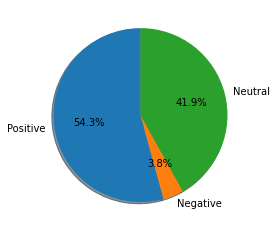

In [77]:
# Plotting each class and its tweet length percentage
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive.shape[0], negative.shape[0], neutral.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()


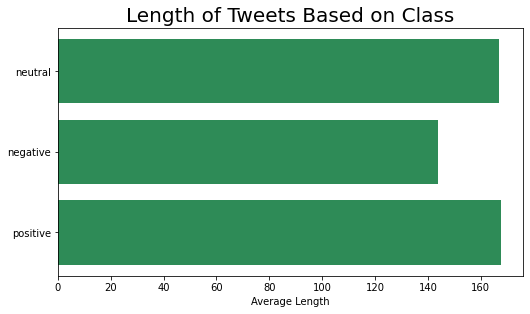

In [84]:
# Plotting each class and its average tweet length
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(['positive', 'negative', 'neutral'], [average_positive, average_negative, average_neutral],
        align='center', linewidth=1, color = 'seagreen')
ax.set_xlabel("Average Length")
ax.set_title("Length of Tweets Based on Class", fontsize=20)
plt.tight_layout(pad=3)
plt.show()

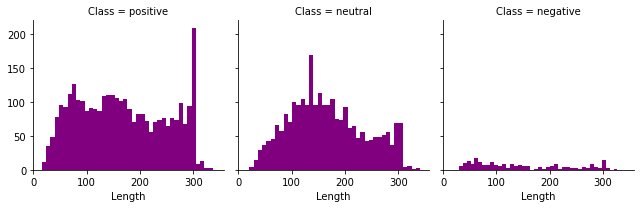

In [99]:
chart = sns.FacetGrid(data=tweets, col='Class')
chart.map(plt.hist, 'Length', bins=40, color='purple')

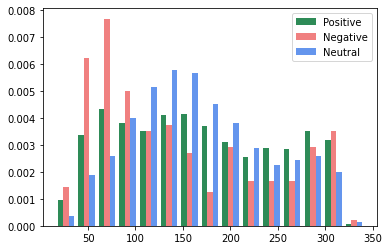

In [90]:

plt.hist([positive.Length, negative.Length, neutral.Length], 
         bins=20,
         density=True,
         label=['Positive', 'Negative', 'Neutral'],
         color=['seagreen', 'lightcoral', 'cornflowerblue'])

plt.legend(prop={'size': 10})

plt.show()
